
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 35</p>
## <p style="text-align: center;">Due: Monday, November 27th, submitted via Canvas by 11:59 pm</p>
### <p style="text-align: center;"> Brett Scroggins (bas4784) and Meyappan Subbaiah (ms47296)

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ensembles (1+12+2 = 15pts)
In this question, we will compare performance of different ensemble methods: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [XGBoost](http://xgboost.readthedocs.io/en/latest/).  Note that you have to install xgboost package in addition to scikit-learn.  You can see installation guides [here](http://xgboost.readthedocs.io/en/latest/build.html).




Two  datasets are provided for this problem. For **each of the datasets ((X1.csv, y1.csv), (X2.csv, y2.csv))**, do the following:

1. Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42.

2. Build a classifier using [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [XGBoost](http://xgboost.readthedocs.io/en/latest/), respectively, and answer the following for each classifier.

 - Mention any design choices (with reasoning/justification) that you made, e.g. the hyperparameters considered for each classifier.
 - Report the mean error rate (fraction of incorrect labels) and the confusion matrix on test data. <br>
 - Report the feature importance and time of execution (training and predicting times).

3. Compare the three classifiers for the two different datasets ((X1.csv, y1.csv), (X2.csv, y2.csv)) in terms of the misclassification rate.  What are the characteristics of the dataset and the classifiers that resulted in somewhat different comparative results?

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Part 1

In [2]:
x1 = pd.read_csv('X1.csv', header = None)
x2 = pd.read_csv('X2.csv', header = None)

y1 = pd.read_csv('y1.csv', header = None)
y1 = y1[0].values
y2 = pd.read_csv('y2.csv', header = None)
y2 = y2[0].values

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, 
                                                    test_size=0.33, 
                                                    random_state=42)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, 
                                                    test_size=0.33, 
                                                    random_state=42)

## Part 2
### Random Forest
#### X1 and Y1

In [3]:
RFC = RandomForestClassifier()
param_grid_RFC = { 'n_estimators' : [5,25,50],
                  'criterion' : ['gini', 'entropy']}
cv_RFC = GridSearchCV(estimator = RFC, param_grid=param_grid_RFC, cv=5)
cv_RFC.fit(x1_train, y1_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 25, 50], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [4]:
print 'Best Parameters: {}'.format(cv_RFC.best_params_)
print 'Best Score: {:.3f}'.format(cv_RFC.best_score_)

Best Parameters: {'n_estimators': 50, 'criterion': 'gini'}
Best Score: 0.877


In [5]:
t0 = time()
best_RFC = RandomForestClassifier(n_estimators = 25, criterion = 'gini')
model_RFC = best_RFC.fit(x1_train, y1_train)
print "Fitting time: {:.3f} sec".format(time() - t0,3)

t1 = time()
y1_pred_RFC = model_RFC.predict(x1_test)
print 'Prediction time: {:.3f} sec'.format(time() - t1)

Fitting time: 0.722 sec
Prediction time: 0.021 sec


In [6]:
conf_mat = confusion_matrix(y1_test, y1_pred_RFC)
print conf_mat
acc = np.sum(np.diagonal(conf_mat))/float(np.sum(conf_mat))
print 'Percent Incorrect: {:.3f}%'.format((1-acc)*100)

[[1430  251]
 [ 149 1470]]
Percent Incorrect: 12.121%


In [7]:
importances_1 = best_RFC.feature_importances_

#### X2 and Y2

In [8]:
RFC = RandomForestClassifier()
param_grid_RFC = { 'n_estimators' : [5,25,50],
                  'criterion' : ['gini', 'entropy']}
cv_RFC = GridSearchCV(estimator = RFC, param_grid=param_grid_RFC, cv=5)
cv_RFC.fit(x2_train, y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 25, 50], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [9]:
print 'Best Parameters: {}'.format(cv_RFC.best_params_)
print 'Best Score: {:.3f}'.format(cv_RFC.best_score_)

Best Parameters: {'n_estimators': 50, 'criterion': 'gini'}
Best Score: 0.924


In [10]:
t0 = time()
best_RFC = RandomForestClassifier(n_estimators = 50, criterion = 'gini')
model_RFC = best_RFC.fit(x2_train, y2_train)
print "Fitting time: {:.3f} sec".format(time() - t0)

t1 = time()
y2_pred_RFC = model_RFC.predict(x2_test)
print 'Prediction time: {:.3f} sec'.format(time() - t1)

Fitting time: 0.557 sec
Prediction time: 0.032 sec


In [11]:
conf_mat = confusion_matrix(y2_test, y2_pred_RFC)
print conf_mat
acc = np.sum(np.diagonal(conf_mat))/float(np.sum(conf_mat))
print 'Percent Incorrect: {:.3f}%'.format((1-acc)*100)

[[789  61]
 [ 39 761]]
Percent Incorrect: 6.061%


### Feature Importances RF (1 vs. 2)

In [12]:
## importance 1 found above
indices_1 = np.argsort(importances_1)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(importances_1)):
    print("%d. feature %d (%f)" % (f + 1, indices_1[f], importances_1[indices_1[f]]))

Feature ranking:
1. feature 22 (0.420803)
2. feature 21 (0.095119)
3. feature 18 (0.065701)
4. feature 0 (0.043312)
5. feature 6 (0.016589)
6. feature 16 (0.016251)
7. feature 8 (0.015218)
8. feature 7 (0.015192)
9. feature 17 (0.015173)
10. feature 2 (0.014954)
11. feature 24 (0.014905)
12. feature 27 (0.014859)
13. feature 19 (0.014834)
14. feature 14 (0.014773)
15. feature 12 (0.014653)
16. feature 9 (0.014613)
17. feature 29 (0.014610)
18. feature 20 (0.014573)
19. feature 4 (0.014540)
20. feature 1 (0.014472)
21. feature 10 (0.014407)
22. feature 3 (0.014120)
23. feature 23 (0.013722)
24. feature 13 (0.013540)
25. feature 25 (0.013534)
26. feature 26 (0.013427)
27. feature 5 (0.013246)
28. feature 11 (0.012960)
29. feature 28 (0.012959)
30. feature 15 (0.012941)


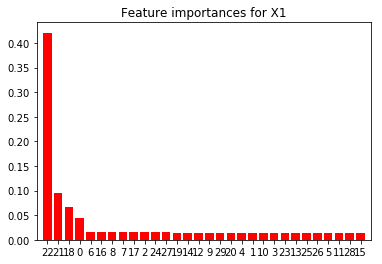

In [13]:
plt.figure()
plt.title("Feature importances for X1")
plt.bar(range(len(importances_1)), importances_1[indices_1],
       color="r", align="center")
plt.xticks(range(len(importances_1)), indices_1)
plt.xlim([-1, len(importances_1)])
plt.show()

In [14]:
importances_2 = best_RFC.feature_importances_
indices_2 = np.argsort(importances_2)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(importances_2)):
    print("%d. feature %d (%f)" % (f + 1, indices_2[f], importances_2[indices_2[f]]))

Feature ranking:
1. feature 9 (0.145360)
2. feature 11 (0.080973)
3. feature 18 (0.079557)
4. feature 15 (0.071037)
5. feature 13 (0.066381)
6. feature 5 (0.058481)
7. feature 4 (0.057322)
8. feature 7 (0.056685)
9. feature 3 (0.055799)
10. feature 6 (0.050083)
11. feature 16 (0.049648)
12. feature 8 (0.048241)
13. feature 10 (0.035701)
14. feature 19 (0.034932)
15. feature 0 (0.029760)
16. feature 2 (0.017315)
17. feature 1 (0.016143)
18. feature 12 (0.015737)
19. feature 14 (0.015687)
20. feature 17 (0.015159)


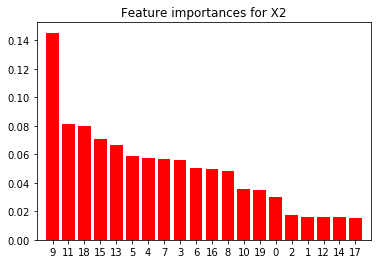

In [15]:
plt.figure()
plt.title("Feature importances for X2")
plt.bar(range(len(importances_2)), importances_2[indices_2],
       color="r", align="center")
plt.xticks(range(len(importances_2)), indices_2)
plt.xlim([-1, len(importances_2)])
plt.show()

### GBDT
#### X1 and Y1

In [16]:
GBC = GradientBoostingClassifier()
param_grid_GBC = {'learning_rate' : [.01, .1, 1],
              'max_depth' : [1,3,5]}
cv_GBC = GridSearchCV(estimator = GBC, param_grid=param_grid_GBC, cv=5)
cv_GBC.fit(x1_train, y1_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [17]:
print 'Best Parameters: {}'.format(cv_GBC.best_params_)
print 'Best Score: {:.3f}'.format(cv_GBC.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best Score: 0.910


In [18]:
t0 = time()
best_GBC = GradientBoostingClassifier(learning_rate = .01,
                                     max_depth = 5)
model_GBC = best_GBC.fit(x1_train, y1_train)
print "Fitting time: {:.3f} sec".format(time() - t0)

t1 = time()
y1_pred_GBC = model_GBC.predict(x1_test)
print 'Prediction time: {:.3f} sec'.format(time() - t1)

Fitting time: 3.329 sec
Prediction time: 0.009 sec


In [19]:
conf_mat = confusion_matrix(y1_test, y1_pred_GBC)
print conf_mat
acc = np.sum(np.diagonal(conf_mat))/float(np.sum(conf_mat))
print 'Percent Incorrect: {:.3f}%'.format((1-acc)*100)

[[1451  230]
 [ 160 1459]]
Percent Incorrect: 11.818%


In [20]:
imp_1g = best_GBC.feature_importances_

#### X2 and Y2

In [21]:
GBC = GradientBoostingClassifier()
param_grid_GBC = {'learning_rate' : [.01, .1, 1],
              'max_depth' : [1,3,5]}
cv_GBC = GridSearchCV(estimator = GBC, param_grid=param_grid_GBC, cv=5)
cv_GBC.fit(x2_train, y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [22]:
print 'Best Parameters: {}'.format(cv_GBC.best_params_)
print 'Best Score: {:.3f}'.format(cv_GBC.best_score_)

Best Parameters: {'learning_rate': 1, 'max_depth': 5}
Best Score: 0.927


In [23]:
t0 = time()
best_GBC = GradientBoostingClassifier(learning_rate = .01,
                                     max_depth = 5)
model_GBC = best_GBC.fit(x2_train, y2_train)
print "Fitting time: {:.3f} sec".format(time() - t0)

t1 = time()
y2_pred_GBC = model_GBC.predict(x2_test)
print 'Prediction time: {:.3f} sec'.format(time() - t1)

Fitting time: 1.182 sec
Prediction time: 0.005 sec


In [24]:
conf_mat = confusion_matrix(y2_test, y2_pred_GBC)
print conf_mat
acc = np.sum(np.diagonal(conf_mat))/float(np.sum(conf_mat))
print 'Percent Incorrect: {:.3f}%'.format((1-acc)*100)

[[731 119]
 [ 82 718]]
Percent Incorrect: 12.182%


### Feature Importance (GDBT) 1 vs 2

In [25]:
## importance 1 found above
indices_1 = np.argsort(imp_1g)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(imp_1g)):
    print("%d. feature %d (%f)" % (f + 1, indices_1[f], imp_1g[indices_1[f]]))

Feature ranking:
1. feature 22 (0.710717)
2. feature 18 (0.115904)
3. feature 21 (0.104498)
4. feature 0 (0.063277)
5. feature 29 (0.000770)
6. feature 15 (0.000575)
7. feature 11 (0.000571)
8. feature 16 (0.000525)
9. feature 2 (0.000479)
10. feature 10 (0.000445)
11. feature 7 (0.000335)
12. feature 14 (0.000325)
13. feature 6 (0.000299)
14. feature 25 (0.000287)
15. feature 3 (0.000192)
16. feature 27 (0.000154)
17. feature 13 (0.000115)
18. feature 5 (0.000109)
19. feature 26 (0.000100)
20. feature 24 (0.000086)
21. feature 20 (0.000062)
22. feature 17 (0.000056)
23. feature 28 (0.000044)
24. feature 1 (0.000031)
25. feature 23 (0.000024)
26. feature 12 (0.000019)
27. feature 9 (0.000003)
28. feature 8 (0.000000)
29. feature 4 (0.000000)
30. feature 19 (0.000000)


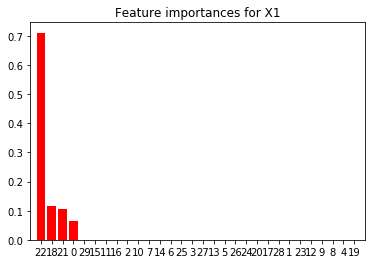

In [26]:
plt.figure()
plt.title("Feature importances for X1")
plt.bar(range(len(imp_1g)), imp_1g[indices_1],
       color="r", align="center")
plt.xticks(range(len(imp_1g)), indices_1)
plt.xlim([-1, len(imp_1g)])
plt.show()

In [27]:
importances_2 = best_GBC.feature_importances_
indices_2 = np.argsort(importances_2)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(importances_2)):
    print("%d. feature %d (%f)" % (f + 1, indices_2[f], importances_2[indices_2[f]]))

Feature ranking:
1. feature 9 (0.211932)
2. feature 11 (0.138748)
3. feature 13 (0.098947)
4. feature 18 (0.089167)
5. feature 15 (0.088201)
6. feature 7 (0.077157)
7. feature 16 (0.055767)
8. feature 5 (0.052513)
9. feature 3 (0.051811)
10. feature 10 (0.034058)
11. feature 4 (0.029346)
12. feature 8 (0.026345)
13. feature 6 (0.018902)
14. feature 19 (0.016828)
15. feature 0 (0.008091)
16. feature 12 (0.001000)
17. feature 2 (0.000466)
18. feature 1 (0.000441)
19. feature 14 (0.000159)
20. feature 17 (0.000122)


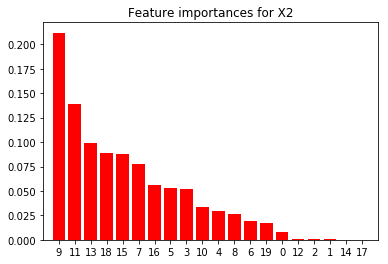

In [28]:
plt.figure()
plt.title("Feature importances for X2")
plt.bar(range(len(importances_2)), importances_2[indices_2],
       color="r", align="center")
plt.xticks(range(len(importances_2)), indices_2)
plt.xlim([-1, len(importances_2)])
plt.show()

### XG Boost
#### X1 and Y1

In [29]:
# fit model no training data
from xgboost import XGBClassifier
xgb = XGBClassifier()
param_grid_XGB = { 'n_estimators' : [5,25,50],
                  'learning_rate' : [.01, .1, 1],
                  'max_depth' : [1,3,5]}
cv_XGB = GridSearchCV(estimator = xgb, param_grid=param_grid_XGB, cv=5)
cv_XGB.fit(x1_train, y1_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 25, 50], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
print 'Best Parameters: {}'.format(cv_XGB.best_params_)
print 'Best Score: {:.3f}'.format(cv_XGB.best_score_)

Best Parameters: {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 5}
Best Score: 0.905


In [31]:
t0 = time()
best_XGB = XGBClassifier(learning_rate = .01,
                                     max_depth = 5,
                                     n_estimators=50)
model_XGB = best_XGB.fit(x1_train, y1_train)
print "Fitting time: {:.3f} sec".format(time() - t0)

t1 = time()
y1_pred_XGB = model_XGB.predict(x1_test)
print 'Prediction time: {:.3f} sec'.format(time() - t1)

Fitting time: 0.348 sec
Prediction time: 0.004 sec


In [32]:
conf_mat = confusion_matrix(y1_test, y1_pred_XGB)
print conf_mat
acc = np.sum(np.diagonal(conf_mat))/float(np.sum(conf_mat))
print 'Percent Incorrect: {:.3f}%'.format((1-acc)*100)

[[1468  213]
 [ 191 1428]]
Percent Incorrect: 12.242%


In [33]:
importances_1 = best_XGB.feature_importances_

#### X2 and Y2

In [34]:
# fit model no training data
from xgboost import XGBClassifier
xgb = XGBClassifier()
param_grid_XGB = { 'n_estimators' : [5,25,50],
                  'learning_rate' : [.01, .1, 1],
                  'max_depth' : [1,3,5]}
cv_XGB = GridSearchCV(estimator = xgb, param_grid=param_grid_XGB, cv=5)
cv_XGB.fit(x2_train, y2_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 25, 50], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
print 'Best Parameters: {}'.format(cv_XGB.best_params_)
print 'Best Score: {:.3f}'.format(cv_XGB.best_score_)

Best Parameters: {'n_estimators': 50, 'learning_rate': 1, 'max_depth': 5}
Best Score: 0.923


In [36]:
t0 = time()
best_XGB = XGBClassifier(learning_rate = 1,
                                     max_depth = 5,
                                     n_estimators=50)
model_XGB = best_XGB.fit(x2_train, y2_train)
print "Fitting time: {:.3f} sec".format(time() - t0)

t1 = time()
y2_pred_XGB = model_XGB.predict(x2_test)
print 'Prediction time: {:.3f} sec'.format(time() - t1)

Fitting time: 0.164 sec
Prediction time: 0.002 sec


In [37]:
conf_mat = confusion_matrix(y2_test, y2_pred_XGB)
print conf_mat
acc = np.sum(np.diagonal(conf_mat))/float(np.sum(conf_mat))
print 'Percent Incorrect: {:.3f}%'.format((1-acc)*100)

[[796  54]
 [ 50 750]]
Percent Incorrect: 6.303%


### Feature Importance

In [38]:
## importance 1 found above
indices_1 = np.argsort(importances_1)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(importances_1)):
    print("%d. feature %d (%f)" % (f + 1, indices_1[f], importances_1[indices_1[f]]))

Feature ranking:
1. feature 18 (0.274408)
2. feature 21 (0.229290)
3. feature 0 (0.210799)
4. feature 22 (0.178994)
5. feature 11 (0.020710)
6. feature 16 (0.019970)
7. feature 29 (0.014053)
8. feature 5 (0.011834)
9. feature 25 (0.008136)
10. feature 13 (0.007396)
11. feature 1 (0.007396)
12. feature 14 (0.004438)
13. feature 17 (0.002959)
14. feature 2 (0.002219)
15. feature 7 (0.002219)
16. feature 27 (0.002219)
17. feature 24 (0.001479)
18. feature 8 (0.000740)
19. feature 4 (0.000740)
20. feature 28 (0.000000)
21. feature 12 (0.000000)
22. feature 10 (0.000000)
23. feature 9 (0.000000)
24. feature 15 (0.000000)
25. feature 6 (0.000000)
26. feature 26 (0.000000)
27. feature 3 (0.000000)
28. feature 19 (0.000000)
29. feature 20 (0.000000)
30. feature 23 (0.000000)


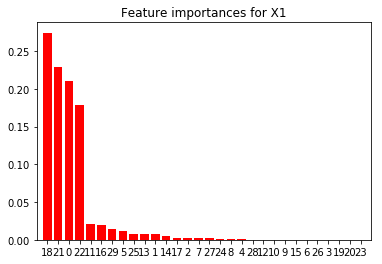

In [39]:
plt.figure()
plt.title("Feature importances for X1")
plt.bar(range(len(importances_1)), importances_1[indices_1],
       color="r", align="center")
plt.xticks(range(len(importances_1)), indices_1)
plt.xlim([-1, len(importances_1)])
plt.show()

In [40]:
importances_2 = best_XGB.feature_importances_
indices_2 = np.argsort(importances_2)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(len(importances_2)):
    print("%d. feature %d (%f)" % (f + 1, indices_2[f], importances_2[indices_2[f]]))

Feature ranking:
1. feature 9 (0.075297)
2. feature 4 (0.068692)
3. feature 15 (0.067371)
4. feature 16 (0.064729)
5. feature 11 (0.064729)
6. feature 5 (0.063408)
7. feature 13 (0.062087)
8. feature 18 (0.060766)
9. feature 8 (0.058124)
10. feature 3 (0.056803)
11. feature 7 (0.054161)
12. feature 10 (0.052840)
13. feature 6 (0.046235)
14. feature 0 (0.043593)
15. feature 19 (0.042272)
16. feature 17 (0.031704)
17. feature 1 (0.025099)
18. feature 12 (0.023778)
19. feature 2 (0.021136)
20. feature 14 (0.017173)


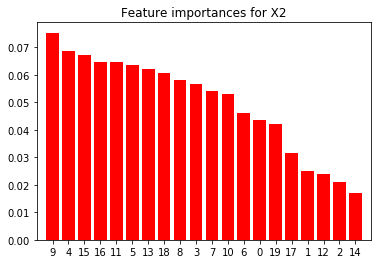

In [41]:
plt.figure()
plt.title("Feature importances for X2")
plt.bar(range(len(importances_2)), importances_2[indices_2],
       color="r", align="center")
plt.xticks(range(len(importances_2)), indices_2)
plt.xlim([-1, len(importances_2)])
plt.show()

# Question 2: Visualization using Bokeh (10 pts)

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the "nbasalariesfull.csv" data set from HMK4, your goal is to build a Bokeh visualization which allows the user to explore how salary (on a log scale) varies with points per game (PSG) and age. You will create a visualization that allows the user to toggle the X axis of a scatter plot between PSG and age, with the y-axis always being log Salary. Also add the hover tool so that if the user hovers over a datapoint in the plot a window pops up that shows the player name, team, position, salary, and the current x variable (PSG or age) depending on the current tab.  Color each point according to a player's position and provide a legend for the colors. Add the ability to Zoom in/out.  Add slight horizontal jitter to a player's age.

Hints: 
1. see: http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#basic-tooltips for hover and zoom tool examples.
2. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
3. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
4. See: https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html  for how to use jitter transform
5. See: http://bokeh.pydata.org/en/latest/docs/gallery/iris.html for coloring points by category
6. Use output_notebook() from Bokeh to output the plot to your notebook

Include an image screenshot in addition to the visualization output.

In [42]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxZoomTool,CategoricalColorMapper
from bokeh.transform import jitter
from bokeh.plotting import figure, output_notebook, show

data = pd.read_csv("nbasalariesfull.csv")
data["logsalary"] = data.SALARY.apply(np.log)

In [43]:
dat = ColumnDataSource(data)
hover = HoverTool(
        tooltips=[
            ("Player Name", "@Player"),
            ("Team", "@Tm"),
            ("Position", "@Pos"),
            ("Salary", "@SALARY"),
            ("x","$x")
        ]
    )

In [44]:
#https://github.com/bokeh/bokeh/issues/5112
color_mapper = CategoricalColorMapper(factors=['PG', 'SG', 'SF','PF','C','PF-C','SG-SF'], 
                                      palette=['red','blue','green','orange','crimson','purple','black'])

In [45]:
from bokeh.layouts import layout
output_notebook()

p = figure(plot_width=600, plot_height=600,tools=[hover,'box_zoom','wheel_zoom'])
p.circle(x="PSG", y="logsalary",color={'field': 'Pos', 'transform': color_mapper},
        legend='Pos',fill_alpha=0.2,source=dat)
p.xaxis.axis_label = "Points Per Game"
p.yaxis.axis_label = "Salary USD (log)"
p.legend.location = "bottom_right"
p.legend.background_fill_color = "navy"
p.legend.background_fill_alpha = 0.5


p1 = figure(plot_width=600, plot_height=600,tools=[hover,'box_zoom','wheel_zoom'])
p1.circle(x=jitter("Age",width=0.6, range=p.x_range), y="logsalary",
           color={'field': 'Pos', 'transform': color_mapper}, 
          legend='Pos',fill_alpha=0.2,source=dat)
p1.xaxis.axis_label = "Age"
p1.yaxis.axis_label = "Salary USD (log)"
p1.legend.location = "bottom_right"
p1.legend.background_fill_color = "navy"
p1.legend.background_fill_alpha = 0.5


tab1 = Panel(child=p, title="PPG")
tab2 = Panel(child=p1, title="Age")
tabs = Tabs(tabs=[ tab1, tab2 ])
show(tabs)

Loading BokehJS ...

## Solution

# Question 3: Diabetes classification using support vector machines (4+3+3=10 pts) 
(a) Apply a linear SVM, using the scikit-SVM, for the Pima Indian Women diabetes detection problem on the dataset provided (details on dataset here  http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) . Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

(b) Repeat (a) but using a Gaussian radial basis kernel.

(c) Summarize the comparative performance (mean error rates) of the classifiers. What do you conclude? (be brief).

In [46]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import grid_search

data_train = pd.read_csv('diabetes_train-log.csv')
data_test = pd.read_csv('diabetes_test-log.csv')
cols = ['numpreg', 'plasmacon', 'bloodpress', 'skinfold', 'seruminsulin', 'BMI', 'pedigreefunction', 'age']

xtrain = np.asmatrix(data_train[cols])
ytrain = np.asarray(data_train['classvariable']).T

xtest = np.asmatrix(data_test[cols])
ytest = np.asarray(data_test['classvariable']).T

## SOLUTION

### Part A - Select C (slack penalty)

In [47]:
parameters = {'C':np.linspace(0.5,25)}
svr = SVC(kernel='linear')
clf = grid_search.GridSearchCV(svr, parameters,cv=10)
clf.fit(xtrain, ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,
        23. ,  23.5,  24. ,  24.5,  25. ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [48]:
clf.best_params_

{'C': 3.5}

In [49]:
from sklearn.metrics import mean_squared_error
ypred_tr = clf.predict(xtrain)
ypred_ts = clf.predict(xtest)
print "(Train) Mean squared error is: %.2f" % mean_squared_error(ytrain,ypred_tr)
print "(Test) Mean squared error: %.2f" % mean_squared_error(ytest,ypred_ts)

(Train) Mean squared error is: 0.24
(Test) Mean squared error: 0.20


### Part B - Select C (slack penalty) w/ Gaussian RBF

In [50]:
parameters = {'C':np.linspace(0.5,25)}
svr = SVC(kernel='rbf')
clf = grid_search.GridSearchCV(svr, parameters,cv=10)
clf.fit(xtrain, ytrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,   4.5,
         5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,
        18.5,  19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,
        23. ,  23.5,  24. ,  24.5,  25. ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [51]:
clf.best_params_

{'C': 1.5}

In [52]:
ypred_tr_rbf = clf.predict(xtrain)
ypred_ts_rbf = clf.predict(xtest)
print "(Train) Mean squared error is: %.2f" % mean_squared_error(ytrain,ypred_tr_rbf)
print "(Test) Mean squared error: %.2f" % mean_squared_error(ytest,ypred_ts_rbf)

(Train) Mean squared error is: 0.24
(Test) Mean squared error: 0.24


### Part C - Explanation

Check this out:https://stats.stackexchange.com/questions/73032/linear-kernel-and-non-linear-kernel-for-support-vector-machine